## Chapter9 - Working with Structured Data:

In [142]:
!pip install pymed wordcloud --quiet

You should consider upgrading via the 'c:\users\saleh alkhalifa\anaconda3\python.exe -m pip install --upgrade pip' command.


In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

### Getting Data:

In [2]:
from pymed import PubMed
pubmed = PubMed()

In [3]:
query = "monoclonal antibody"

In [4]:
results = pubmed.query(query, max_results=100)

In [5]:
results

In [6]:
articleList = []
for article in results:
    articleDict = article.toDict()
    articleList.append(articleDict)

In [7]:
df = pd.DataFrame(articleList)
df.head()

,pubmed_id,title,abstract,keywords,journal,publication_date,authors,methods,conclusions,results,copyrights,doi,xml,isbn,language,publication_type,sections,publisher,publisher_location
0,34433086,Characterization of the variable lymphocyte re...,Agnathans possess a convergent adaptive immune...,"[Antibody, Brook lamprey, Gene, Transcript, Va...",Developmental and comparative immunology,2021-08-26,"[{'lastname': 'Rekedal', 'firstname': 'Kyle L'...",NaN,None,None,Copyright © 2021. Published by Elsevier Ltd.,10.1016/j.dci.2021.104241,"[[[], [<Element 'Year' at 0x00000243A7AB8F90>,...",NaN,NaN,NaN,NaN,NaN,NaN
1,34432859,Antibody responses induced by SHIV infection a...,The development of an effective human immunode...,[],PLoS pathogens,2021-08-26,"[{'lastname': 'van Schooten', 'firstname': 'Je...",NaN,None,None,None,10.1371/journal.ppat.1009736,"[[[], [<Element 'Year' at 0x00000243A7AE3540>,...",NaN,NaN,NaN,NaN,NaN,NaN
2,34432796,Recombinant cystatin-like protein-based compet...,Trichinella spiralis is a zoonotic parasite wi...,[],PLoS neglected tropical diseases,2021-08-26,"[{'lastname': 'Liu', 'firstname': 'Yan', 'init...",NaN,None,The rCLP-cELISA showed high agreement with com...,None,10.1371/journal.pntd.0009723,"[[[], [<Element 'Year' at 0x00000243A7AEEA40>,...",NaN,NaN,NaN,NaN,NaN,NaN
3,34432512,Isolation and morphological characterization o...,To characterize the ultrastructure of mesenchy...,[],American journal of veterinary research,2021-08-26,"[{'lastname': 'Pérez-Castrillo', 'firstname': ...",NaN,None,The protocols for transfection and subsequent ...,None,10.2460/ajvr.82.9.770,"[[[], [<Element 'Year' at 0x00000243A7D04450>,...",NaN,NaN,NaN,NaN,NaN,NaN
4,34432389,Evaluation of atezolizumab immunogenicity: Cli...,Baseline patient characteristics and prognosti...,[],Clinical and translational science,2021-08-26,"[{'lastname': 'Wu', 'firstname': 'Benjamin', '...",NaN,None,None,© 2021 Genentech Inc/Roche. Clinical and Trans...,10.1111/cts.13127,"[[[], [<Element 'Year' at 0x00000243A7D09E00>,...",NaN,NaN,NaN,NaN,NaN,NaN


### Analyzing Character Distributions:

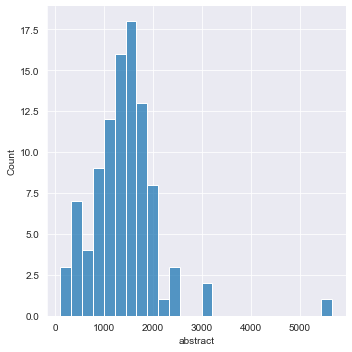

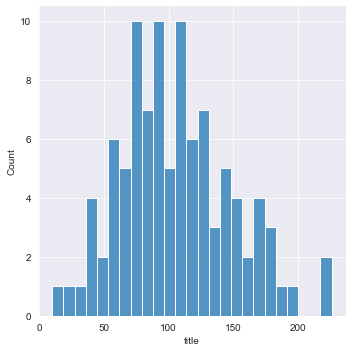

In [8]:
sns.displot(df.abstract.str.len(), bins=25)
sns.displot(df.title.str.len(), bins=25)

In [9]:
df["text"] = df["title"] + " " + df["abstract"]

In [10]:
df[["title", "abstract", "text"]]

,title,abstract,text
0,Characterization of the variable lymphocyte re...,Agnathans possess a convergent adaptive immune...,Characterization of the variable lymphocyte re...
1,Antibody responses induced by SHIV infection a...,The development of an effective human immunode...,Antibody responses induced by SHIV infection a...
2,Recombinant cystatin-like protein-based compet...,Trichinella spiralis is a zoonotic parasite wi...,Recombinant cystatin-like protein-based compet...
3,Isolation and morphological characterization o...,To characterize the ultrastructure of mesenchy...,Isolation and morphological characterization o...
4,Evaluation of atezolizumab immunogenicity: Cli...,Baseline patient characteristics and prognosti...,Evaluation of atezolizumab immunogenicity: Cli...
...,...,...,...
95,Dermatomyositis following Biosimilar Trastuzum...,"Trastuzumab, as a recombinant IgG1 kappa, is a...",Dermatomyositis following Biosimilar Trastuzum...
96,A Real-World Evaluation of Clinical Outcomes o...,The important progress made on asthma phenotyp...,A Real-World Evaluation of Clinical Outcomes o...
97,"GM-CSF drives myelopoiesis, recruitment and po...",Intrahepatic cholangiocarcinoma (iCCA) is risi...,"GM-CSF drives myelopoiesis, recruitment and po..."
98,Understanding the impacts of COVID-19 pandemic...,The coronavirus disease 2019 (COVID-19) pandem...,Understanding the impacts of COVID-19 pandemic...


In [11]:
print(df.title.str.len().mean())
print(df.abstract.str.len().mean())
print(df.text.str.len().mean())


105.11
1410.4536082474226
1518.0103092783504


In [12]:
df.text.str.split(expand=True).stack().value_counts()

of                   847
the                  733
and                  726
in                   473
to                   357
                    ... 
regenerative           1
medicine,              1
repurposed             1
anti-inflammatory      1
interprofessional      1
Length: 6222, dtype: int64

### Cleaning Data:

In [13]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('stopwords')

import re

STOP_WORDS = stopwords.words()

[nltk_data] Downloading package punkt to C:\Users\Saleh
[nltk_data]     Alkhalifa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Saleh
[nltk_data]     Alkhalifa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:
def cleaner(text):
    if type(text) == str:
        text = text.lower()
        text = re.sub("[^a-zA-Z]+", ' ', text)
        text_tokens = word_tokenize(text)
        tokens_without_sw = [word for word in text_tokens if not word in STOP_WORDS]
        filtered_sentence = (" ").join(tokens_without_sw)
        return filtered_sentence

In [15]:
cleaner("Biotech in 2021 is a wonderful field to work and study in!")

'biotech wonderful field work study'

In [16]:
df["clean_text"] = df["text"].apply(lambda x: cleaner(x))

In [17]:
df[["text", "clean_text"]].head()

,text,clean_text
0,Characterization of the variable lymphocyte re...,characterization variable lymphocyte receptor ...
1,Antibody responses induced by SHIV infection a...,antibody responses induced shiv infection focu...
2,Recombinant cystatin-like protein-based compet...,recombinant cystatin like protein based compet...
3,Isolation and morphological characterization o...,isolation morphological characterization equin...
4,Evaluation of atezolizumab immunogenicity: Cli...,evaluation atezolizumab immunogenicity clinica...


In [18]:
df.clean_text.str.split(expand=True).stack().value_counts()

patients             169
antibody             118
monoclonal           117
treatment            103
anti                  92
                    ... 
respects               1
acceptable             1
regulatory             1
medicine               1
interprofessional      1
Length: 3658, dtype: int64

In [19]:
df2 = df[["clean_text"]].dropna()
# df2 = df[df["clean_text"].str.len() > 100]

df2.shape

(97, 1)

In [20]:
df["clean_text"].head()

0    characterization variable lymphocyte receptor ...
1    antibody responses induced shiv infection focu...
2    recombinant cystatin like protein based compet...
3    isolation morphological characterization equin...
4    evaluation atezolizumab immunogenicity clinica...
Name: clean_text, dtype: object

### Creating WordClouds:

In [22]:
from wordcloud import WordCloud, STOPWORDS
plt.figure(figsize=(20,10))

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

In [23]:
wordcloud = WordCloud(width = 5000, 
                      height = 3000, 
                      random_state=1, 
                      background_color='white', 
                      colormap='Blues', 
                      collocations=False, 
                      stopwords = STOPWORDS).generate(' '.join(df2['clean_text']))


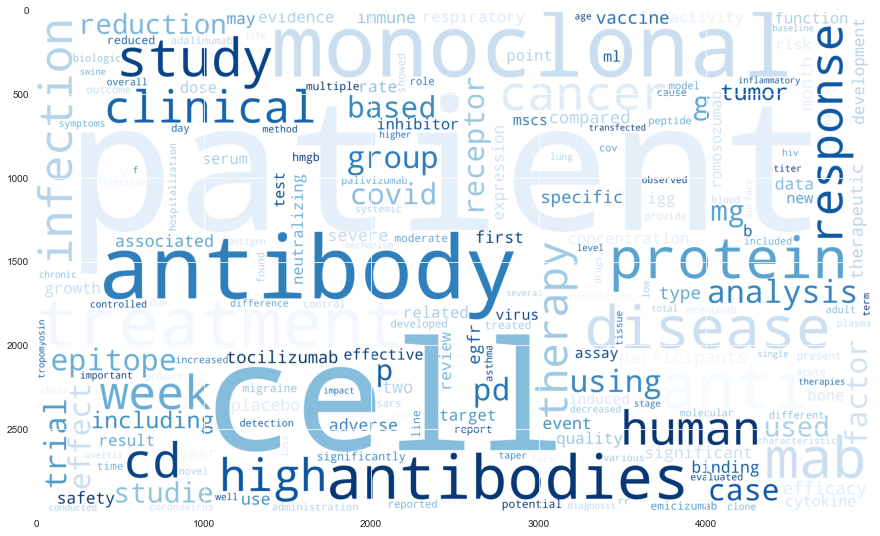

In [24]:
plt.figure( figsize=(15,10) )
plt.imshow(wordcloud)

### Topic Modelling: